```We found the random matrix may not be a good option for Basis scan, as it may give wierd results. we would like to use SGD for optimization instead of matrix inverse```

In [1]:
import os;
from google.colab import drive
drive.mount('/content/drive', force_remount=True);

path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/DMD simulation";
os.chdir(path);
os.listdir(path);

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


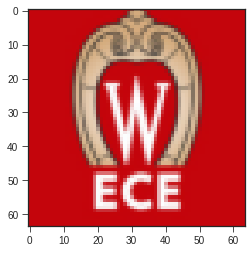

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib.image as mpimg;
plt.style.use(['seaborn-ticks'])

from PMT_compressed_sensing_simu import Compressed_sensing_PMT as CSP;
from YZ_masks import Haar_2d, Hyper_raster;

r = 64;
c = 64;

#########################################################
ratio_val = 0. ## to determine how many 1s in the masks!
Pnoise = True;
Gnoise = False;

Voxtel_camera = 25 * 256**2; ## the photon number per second for Vextel camera is 400
#########################################################

error = [];

pmt = CSP();
pmt.Load_img("ECE.jpg",RGB = True, size = (r,c), anti_aliasing = False);

In [0]:
n_ph_per_sec = 1e6;

maximum_time = 150;
data_density = 15;
time = (np.arange(data_density)+1)/data_density*maximum_time;
time = [1e-2, 1e-1,1e-0] + list(time);

Error_walsh_basis = np.zeros(len(time));
Error_random_basis = np.zeros(len(time));
Error_dct_basis = np.zeros(len(time));

basis_cycles = r*c;

size = pmt.img.shape;
if len(size) == 2:
    layers = 1;
elif len(size) == 3:
    layers = 3;

pmt.Make_DMD_basis(basis_cycles, scan_mode="Random", ratio = 0);
random_basis = pmt.DMD_basis;
measure_random = np.zeros((basis_cycles, layers, len(time)));

pmt.Make_DMD_basis(basis_cycles, scan_mode="Basis", ratio = 0);
walsh_basis = pmt.DMD_basis;
measure_walsh = np.zeros((basis_cycles, layers, len(time)));

dct_basis = pmt.DCT_Matrix(r*c);
dct_basis -= np.min(dct_basis);
measure_dct = np.zeros((basis_cycles, layers, len(time)));

## analyzing the orthonormallity
unity_basis = np.eye(r*c);
residual_basis = np.ones((r*c, r*c)) - unity_basis;
Error_unity_basis = np.zeros(len(time));
Error_residual_basis = np.zeros(len(time));

measure_unity = np.zeros((basis_cycles, layers, len(time)));
measure_residual = np.zeros((basis_cycles, layers, len(time)));



In [4]:
for time_index in range(len(time)):
    print("%s/%s"%(time_index+1, len(time)));
    time_ep = time[time_index];
    n_ph_tot = time_ep * n_ph_per_sec;

    light_level_basis = n_ph_tot / basis_cycles / (r*c);
    print("The number of photons per mask per pixel is %.3e"%light_level_basis);

    measure_random[:,:,time_index] = pmt.PMT_measure_simu(light_level_basis, basis_cycles,
                                        Poisson = Pnoise, Gaussian = Gnoise,
                                        upload_DMD_basis=random_basis);

    measure_walsh[:,:,time_index] = pmt.PMT_measure_simu(light_level_basis, basis_cycles,
                                        Poisson = Pnoise, Gaussian = Gnoise,
                                        upload_DMD_basis=walsh_basis);  
    
    measure_dct[:,:,time_index] = pmt.PMT_measure_simu(light_level_basis, basis_cycles,
                                        Poisson = Pnoise, Gaussian = Gnoise,
                                        upload_DMD_basis=dct_basis);

    measure_unity[:,:, time_index] = pmt.PMT_measure_simu(light_level_basis, basis_cycles,
                                        Poisson = Pnoise, Gaussian = Gnoise,
                                        upload_DMD_basis=unity_basis);

    measure_residual[:,:,time_index] = pmt.PMT_measure_simu(light_level_basis, basis_cycles,
                                        Poisson = Pnoise, Gaussian = Gnoise,
                                        upload_DMD_basis=residual_basis);



1/18
The number of photons per mask per pixel is 5.960e-04
2/18
The number of photons per mask per pixel is 5.960e-03
3/18
The number of photons per mask per pixel is 5.960e-02
4/18
The number of photons per mask per pixel is 5.960e-01
5/18
The number of photons per mask per pixel is 1.192e+00
6/18
The number of photons per mask per pixel is 1.788e+00
7/18
The number of photons per mask per pixel is 2.384e+00
8/18
The number of photons per mask per pixel is 2.980e+00
9/18
The number of photons per mask per pixel is 3.576e+00
10/18
The number of photons per mask per pixel is 4.172e+00
11/18
The number of photons per mask per pixel is 4.768e+00
12/18
The number of photons per mask per pixel is 5.364e+00
13/18
The number of photons per mask per pixel is 5.960e+00
14/18
The number of photons per mask per pixel is 6.557e+00
15/18
The number of photons per mask per pixel is 7.153e+00
16/18
The number of photons per mask per pixel is 7.749e+00
17/18
The number of photons per mask per pixel is

array([   0,    0, 2371,    2])

In [0]:
random_inv = np.linalg.pinv(random_basis);
walsh_inv = np.linalg.pinv(walsh_basis);
dct_inv = np.linalg.pinv(dct_basis); 
unity_inv = unity_basis;
residual_inv = np.linalg.pinv(residual_basis);

0 / 18


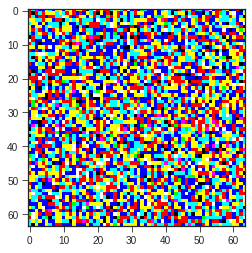

1 / 18


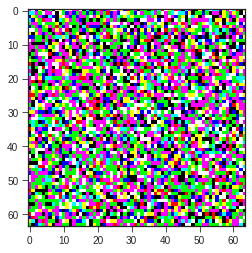

2 / 18


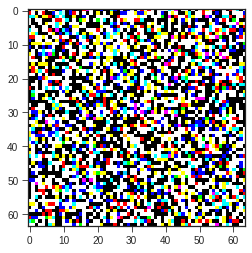

3 / 18


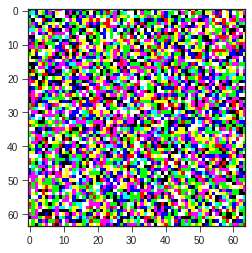

4 / 18


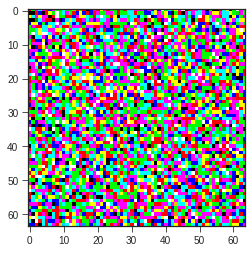

5 / 18


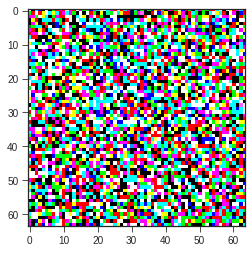

6 / 18


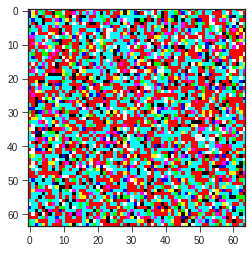

7 / 18


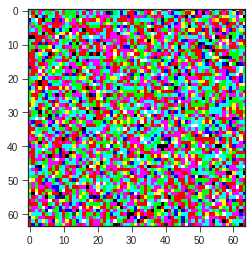

8 / 18


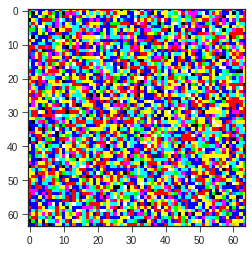

9 / 18


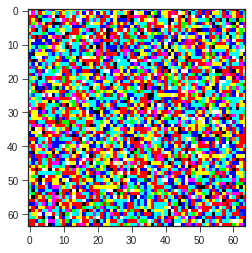

10 / 18


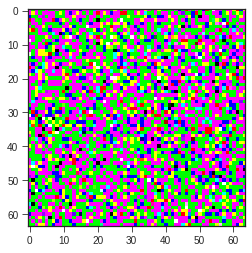

11 / 18


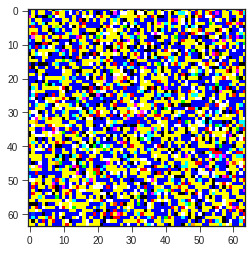

12 / 18


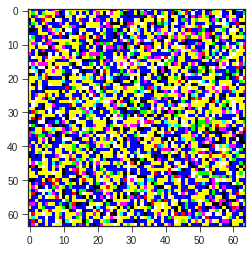

13 / 18


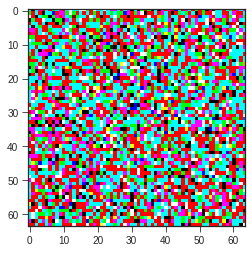

14 / 18


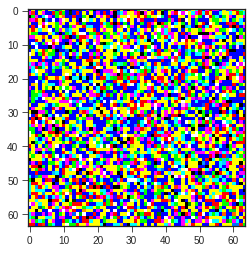

15 / 18


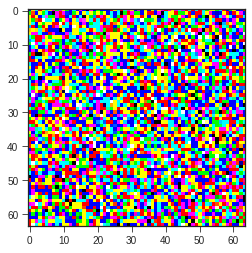

16 / 18


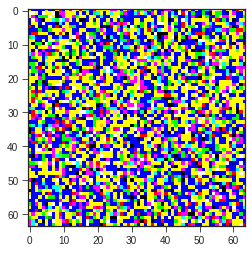

17 / 18


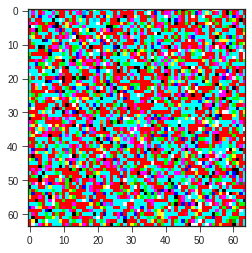

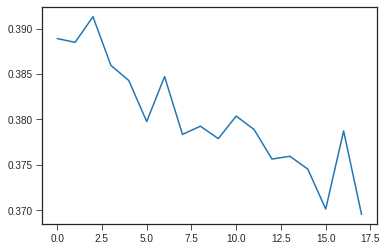

In [7]:
for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_direct_inverse_reconstruction(r, c, random_inv, measure_random[:,:,time_index], CS = False);
    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);
    this_error = (np.mean((recons_clipped - pmt.img)**2));
    
    Error_random_basis[time_index] = this_error;

plt.figure();
plt.plot(Error_random_basis);

0 / 18


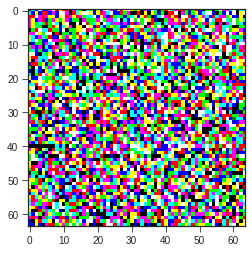

1 / 18


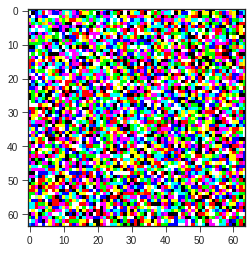

2 / 18


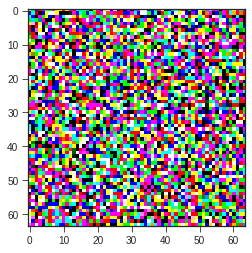

3 / 18


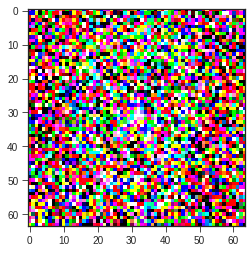

4 / 18


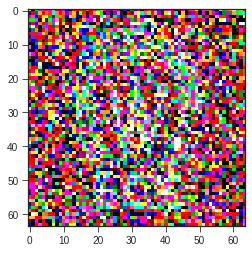

5 / 18


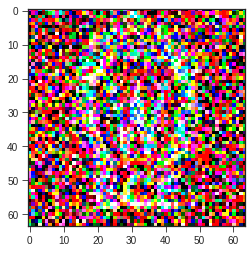

6 / 18


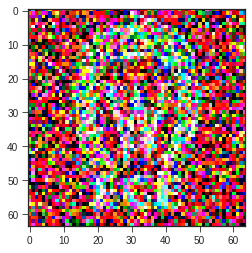

7 / 18


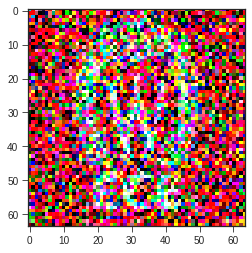

8 / 18


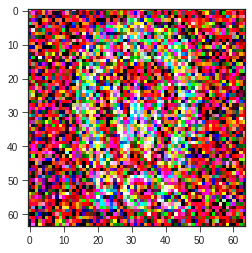

9 / 18


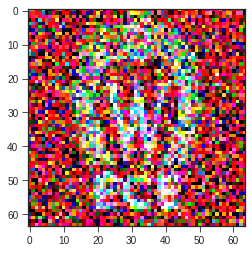

10 / 18


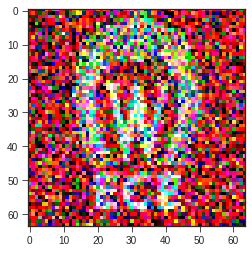

11 / 18


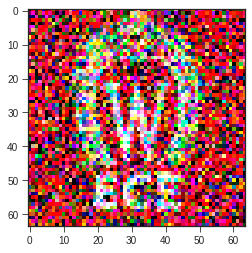

12 / 18


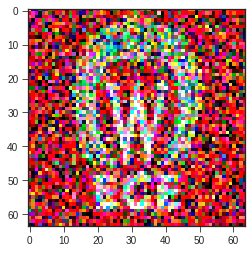

13 / 18


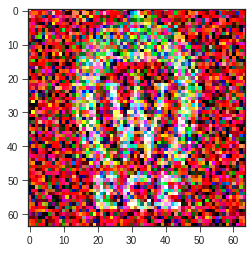

14 / 18


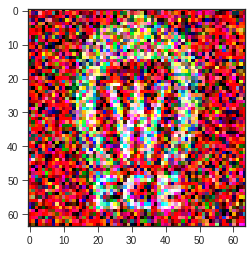

15 / 18


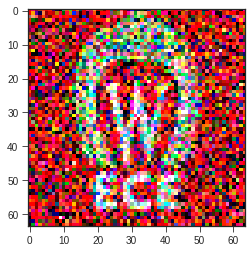

16 / 18


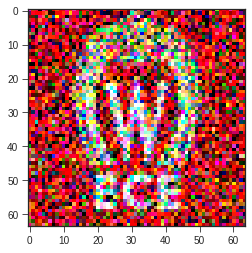

17 / 18


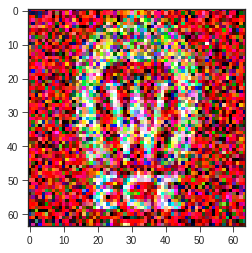

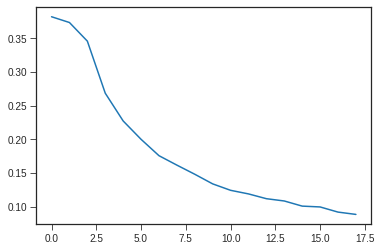

In [8]:
for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_direct_inverse_reconstruction(r, c, walsh_inv, measure_walsh[:,:,time_index], CS = False);
    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);
    this_error = (np.mean((recons_clipped - pmt.img)**2));
    
    Error_walsh_basis[time_index] = this_error;

plt.figure();
plt.plot(Error_walsh_basis);

0 / 18


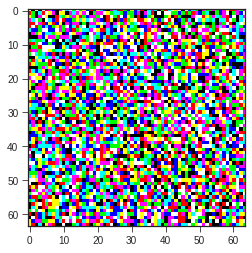

1 / 18


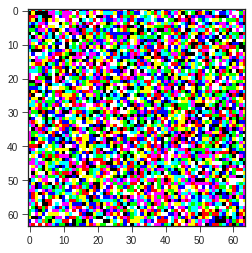

2 / 18


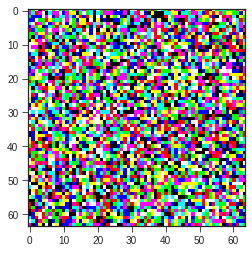

3 / 18


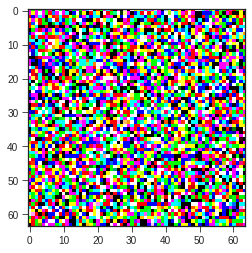

4 / 18


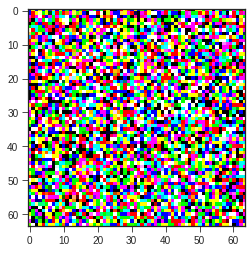

5 / 18


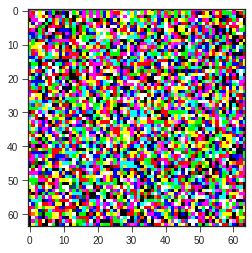

6 / 18


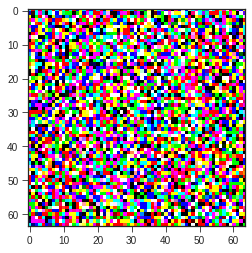

7 / 18


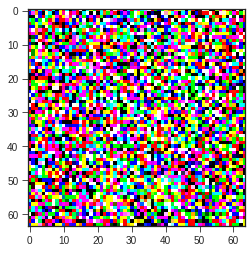

8 / 18


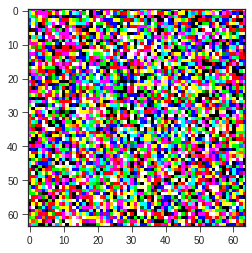

9 / 18


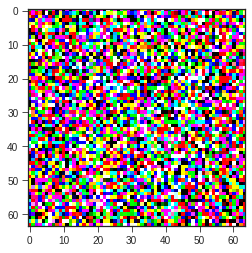

10 / 18


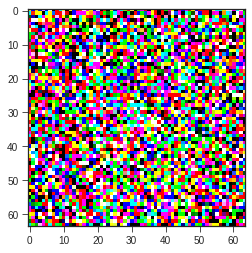

11 / 18


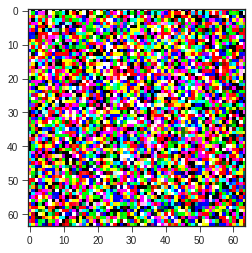

12 / 18


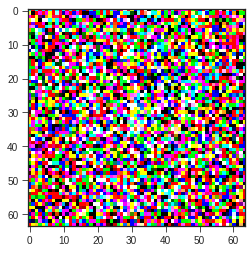

13 / 18


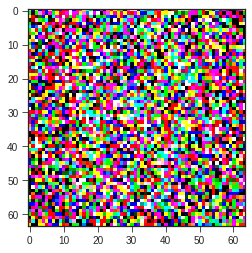

14 / 18


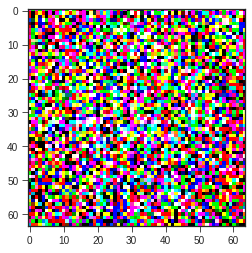

15 / 18


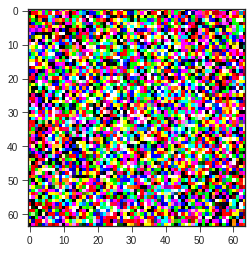

16 / 18


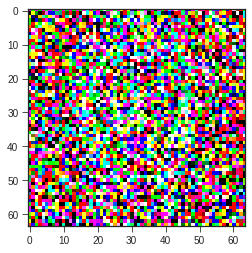

17 / 18


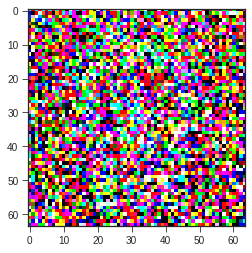

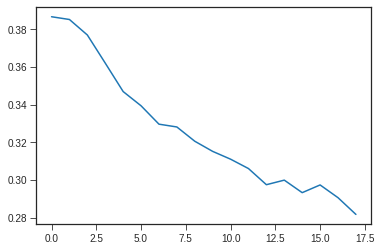

In [9]:
for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_direct_inverse_reconstruction(r, c, dct_inv, measure_dct[:,:,time_index], CS = False);
    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);
    this_error = (np.mean((recons_clipped - pmt.img)**2));
    
    Error_dct_basis[time_index] = this_error;

plt.figure();
plt.plot(Error_dct_basis);

0 / 18


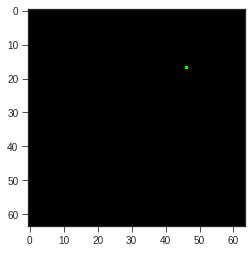

1 / 18


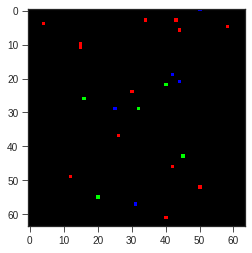

2 / 18


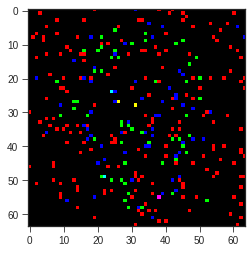

3 / 18


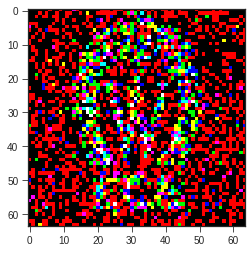

4 / 18


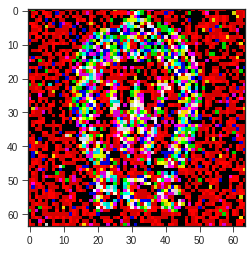

5 / 18


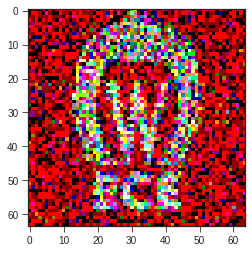

6 / 18


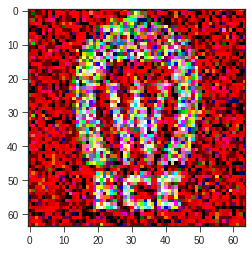

7 / 18


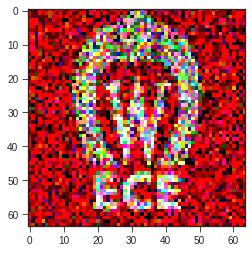

8 / 18


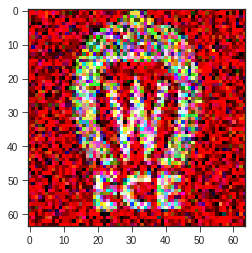

9 / 18


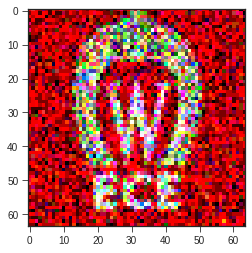

10 / 18


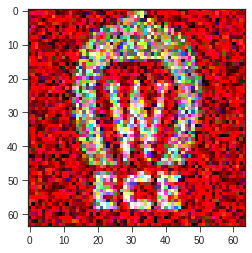

11 / 18


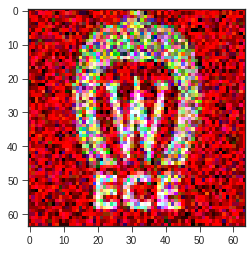

12 / 18


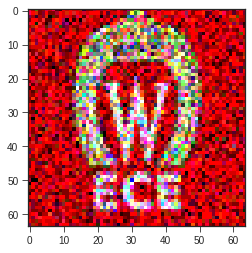

13 / 18


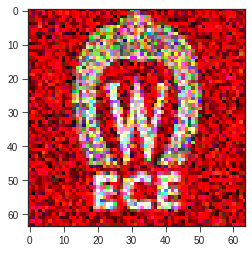

14 / 18


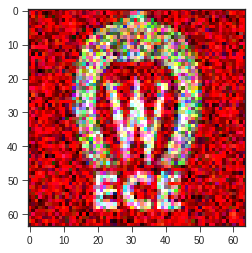

15 / 18


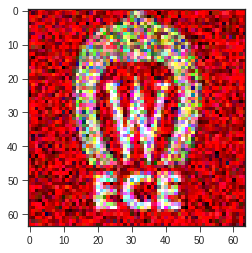

16 / 18


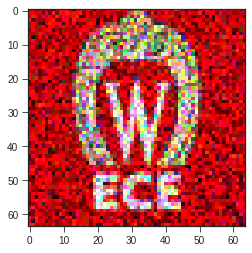

17 / 18


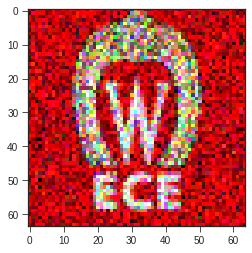

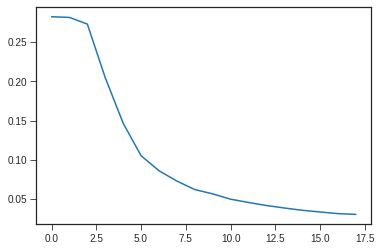

In [10]:
### unity
for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_direct_inverse_reconstruction(r, c, unity_inv, measure_unity[:,:,time_index], CS = False);
    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);
    this_error = (np.mean((recons_clipped - pmt.img)**2));
    
    Error_unity_basis[time_index] = this_error;

plt.figure();
plt.plot(Error_unity_basis);

0 / 18


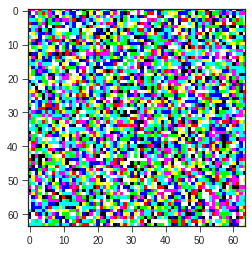

1 / 18


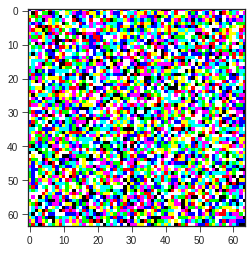

2 / 18


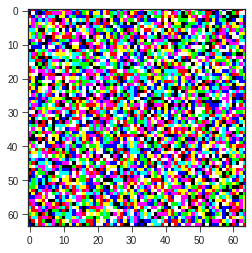

3 / 18


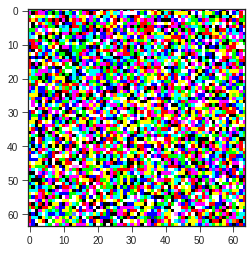

4 / 18


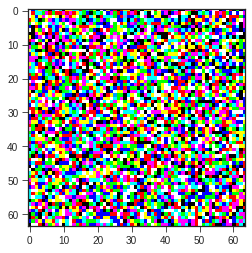

5 / 18


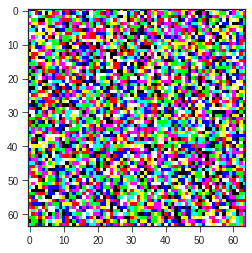

6 / 18


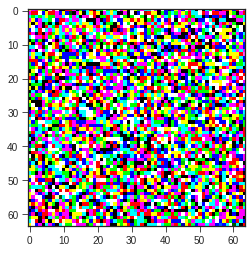

7 / 18


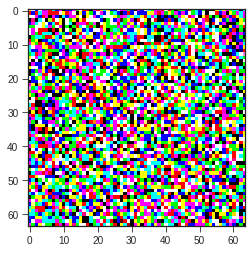

8 / 18


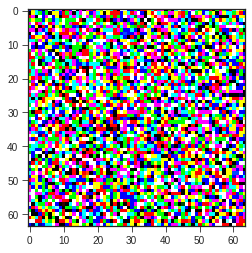

9 / 18


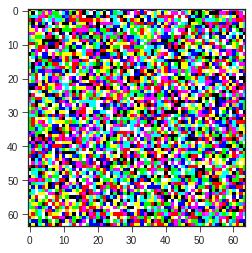

10 / 18


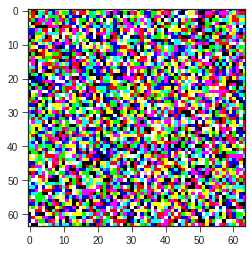

11 / 18


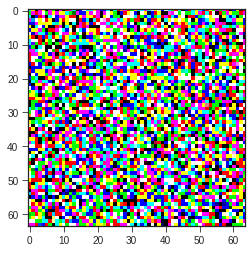

12 / 18


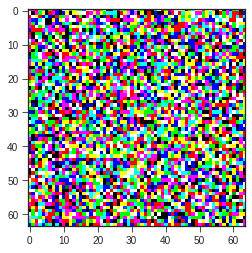

13 / 18


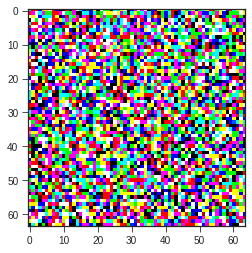

14 / 18


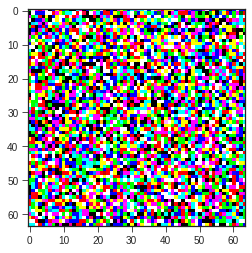

15 / 18


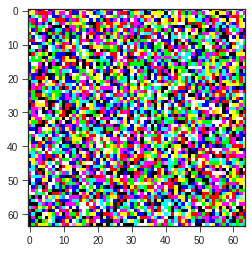

16 / 18


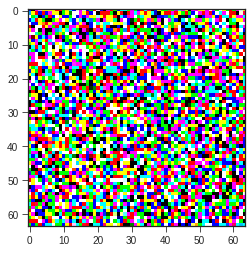

17 / 18


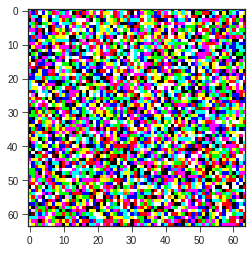

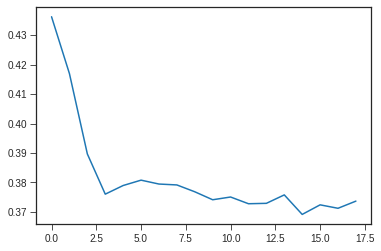

In [11]:
for time_index in range(len(time)):
    print(time_index, '/', len(time));
    pmt.PMT_direct_inverse_reconstruction(r, c, residual_inv, measure_residual[:,:,time_index], CS = False);
    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);
    this_error = (np.mean((recons_clipped - pmt.img)**2));
    
    Error_residual_basis[time_index] = this_error;

plt.figure();
plt.plot(Error_residual_basis);

In [12]:
np.linalg.matrix_rank(random_basis) == r*c

True

```Using gradient descent merhod to optimize random basis```

In [13]:
'''
random_phi = np.eye(r*c);
for time_index in range(len(time)):
    print(time_index, '/', len(time));

    pmt.PMT_reconstruct(r,c,measure_random[:,:,time_index], upload_DMD_basis = random_basis,
                        upload_phi = random_phi,
                        user_evaluation = False, learning_rate = 5e-3,
                        regularization = 0e-4, plot_step= 10000, max_epoch = 50000);

    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);
    this_error = (np.mean((recons_clipped - pmt.img)**2));

    Error_random_basis[time_index] = this_error;

plt.figure();
plt.plot(Error_random_basis);
'''

"\nrandom_phi = np.eye(r*c);\nfor time_index in range(len(time)):\n    print(time_index, '/', len(time));\n\n    pmt.PMT_reconstruct(r,c,measure_random[:,:,time_index], upload_DMD_basis = random_basis,\n                        upload_phi = random_phi,\n                        user_evaluation = False, learning_rate = 5e-3,\n                        regularization = 0e-4, plot_step= 10000, max_epoch = 50000);\n\n    recons_clipped = np.clip(pmt.img_reconstructed, a_min = 0,a_max = 1);\n    this_error = (np.mean((recons_clipped - pmt.img)**2));\n\n    Error_random_basis[time_index] = this_error;\n\nplt.figure();\nplt.plot(Error_random_basis);\n"

In [14]:
pmt.W

array([[-18.09038652,   7.69116199,   3.26181309],
       [-10.48471526,  -3.82919299,  -8.37039001],
       [ 17.36546329,  -0.92114222,  -2.88983278],
       ...,
       [ 13.22708335,  -2.59886382,  -5.68603545],
       [ -8.58329745, -12.77704153,   3.93290173],
       [  8.86500719,   9.14518738, -11.94952942]])

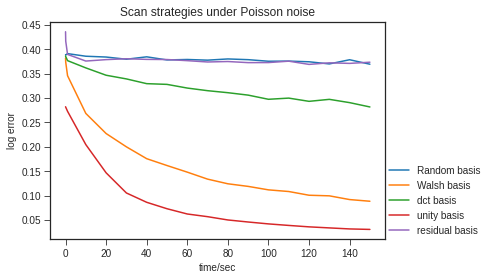

In [15]:
plt.figure();
plt.plot(time, (Error_random_basis), label = "Random basis");
plt.plot(time, (Error_walsh_basis), label = "Walsh basis");
plt.plot(time, (Error_dct_basis), label = "dct basis");
plt.plot(time, (Error_unity_basis), label = "unity basis");
plt.plot(time, (Error_residual_basis), label = "residual basis");
plt.xlabel("time/sec");
plt.ylabel("log error");
#plt.ylim(-3,-0.)
plt.title("Scan strategies under Poisson noise")
plt.legend(loc=[1,0]);
plt.show();